
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [9]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [10]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [11]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,548.78,280.17,-10.27,53.58,0.31,55.94,29.73,75.45,53.58,0.71
1,ACHC,Acadia Healthcare,US Stocks:Healthcare,-23.08,16.36,51.33,34.33,18.11,25.68,15.98,43.25,34.33,0.79
2,ACIW,ACI Worldwide,US Stocks:Technology,147.69,289.89,-17.30,-7.47,3.46,37.39,13.75,33.95,-7.47,-253.61
3,ACM,AECOM,US Stocks:Industrials,64.25,101.44,26.22,23.10,17.86,17.72,6.19,32.85,23.10,0.70
4,ADNT,Adient,US Stocks:Consumer Discretionary,1352.36,294.38,6.11,19.40,-6.34,33.54,13.00,70.24,19.40,0.28
5,AFG,American Financial Group,US Stocks:Financials,-28.91,-8.45,12.51,20.88,12.06,22.35,14.43,28.75,20.88,0.73
6,AGCO,AGCO,US Stocks:Industrials,-33.63,70.12,18.51,25.50,14.82,26.12,20.30,38.40,25.50,0.66
7,AIRC,Apartment Income REIT,US Stocks:Real Estate,258.24,19.72,-24.64,-24.64,-24.64,26.62,11.37,22.09,-24.64,-544.30
8,ALE,ALLETE,US Stocks:Utilities,-41.26,77.18,1.87,-5.30,1.23,19.59,11.05,26.45,-5.30,-140.19
9,ALGM,Allegro MicroSystems,US Stocks:Technology,5335.76,633.93,45.16,45.16,45.16,54.55,23.16,43.72,45.16,1.03


In [12]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
232,NFG,National Fuel Gas,US Stocks:Utilities,-29.72,-32.44,-1.43,15.34,5.24,23.44,15.32,22.59,15.34,0.68
199,LSCC,Lattice Semiconductor,US Stocks:Technology,932.44,527.95,38.24,61.13,65.17,39.55,19.06,50.26,61.13,1.22
77,CUBE,CubeSmart,US Stocks:Real Estate,622.96,101.62,-6.83,18.57,16.06,26.83,7.99,24.90,18.57,0.75
254,OLN,Olin,US Stocks:Materials,683.07,105.18,26.00,63.33,14.92,34.79,11.27,51.78,63.33,1.22
368,VMI,Valmont,US Stocks:Industrials,8.45,16.35,52.54,31.88,15.68,27.42,15.00,28.29,31.88,1.13
331,SWAV,Shockwave Medical,US Stocks:Healthcare,-65.11,-80.96,22.64,61.23,61.23,43.71,28.23,55.69,61.23,1.10
179,KNSL,Kinsale Capital Group,US Stocks:Financials,321.49,-20.98,43.62,35.81,43.80,34.23,17.44,42.12,35.81,0.85
298,RRC,Range Resources,US Stocks:Energy,-16.77,-41.63,14.16,99.93,12.05,36.72,19.42,105.91,99.93,0.94
53,CELH,Celsius Holdings,US Stocks:Consumer Staples,-66.46,27.80,84.44,155.10,74.16,57.86,40.61,86.83,155.10,1.79
87,DKS,Dick's Sporting Goods,US Stocks:Consumer Discretionary,200.11,124.74,19.56,51.68,38.62,25.35,13.26,48.69,51.68,1.06


### Sample Portfolios
Format 'Investment option': weight

In [13]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [14]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [15]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [16]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [17]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [18]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NFG,LSCC,CUBE,OLN,VMI,SWAV,KNSL,RRC,CELH,DKS,IRDM,Ranked Portfolio
Annual Returns,15.34,61.13,18.57,63.33,31.88,61.23,35.81,99.93,155.10,51.68,28.92,45.84
Std Dev,22.59,50.26,24.90,51.78,28.29,55.69,42.12,105.91,86.83,48.69,37.15,36.60
Sharpe Ratio,0.68,1.22,0.75,1.22,1.13,1.10,0.85,0.94,1.79,1.06,0.78,1.25
Weight,0.09,0.07,0.17,0.12,0.09,0.05,0.08,0.07,0.03,0.10,0.15,1.00
Worst Typical Down Year,-29.84,-39.39,-31.23,-40.23,-24.70,-50.15,-48.43,-111.89,-18.56,-45.70,-45.38,-27.36
Black Swan,-52.43,-89.65,-56.13,-92.01,-52.99,-105.84,-90.55,-217.80,-105.39,-94.39,-82.53,-63.96


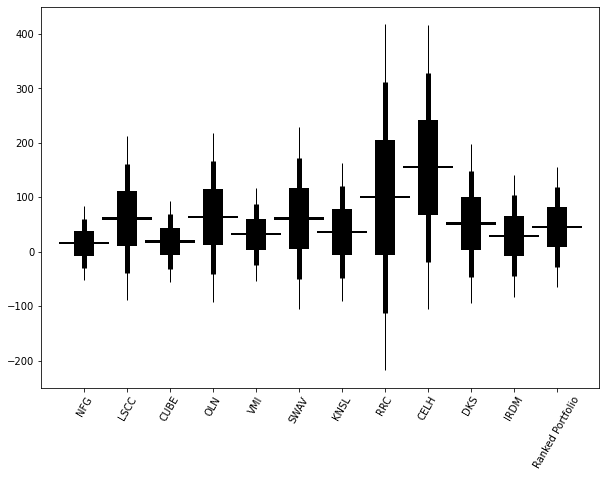

In [19]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

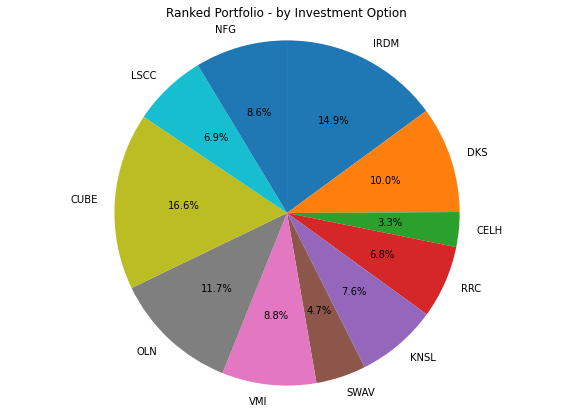

IRDM   0.15
DKS    0.10
CELH   0.03
RRC    0.07
KNSL   0.08
SWAV   0.05
VMI    0.09
OLN    0.12
CUBE   0.17
LSCC   0.07
NFG    0.09



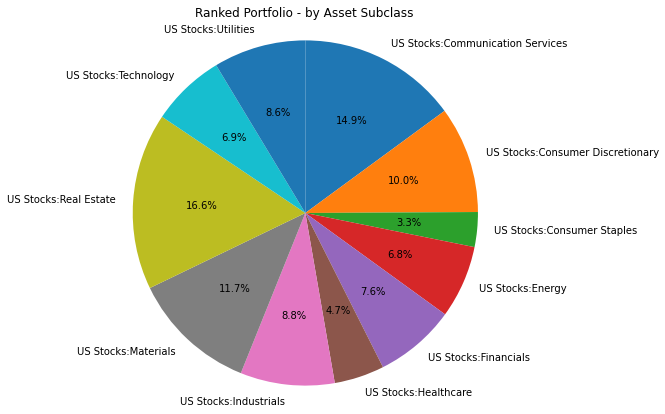

US Stocks:Communication Services   0.15
US Stocks:Consumer Discretionary   0.10
US Stocks:Consumer Staples         0.03
US Stocks:Energy                   0.07
US Stocks:Financials               0.08
US Stocks:Healthcare               0.05
US Stocks:Industrials              0.09
US Stocks:Materials                0.12
US Stocks:Real Estate              0.17
US Stocks:Technology               0.07
US Stocks:Utilities                0.09



In [20]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [21]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NFG                            0.0864
    LSCC                           0.0695
    CUBE                           0.1657
    OLN                            0.1175
    VMI                            0.0883
    SWAV                           0.0469
    KNSL                           0.0759
    RRC                            0.0682
    CELH                           0.0326
    DKS                            0.0998
    IRDM                           0.1493


### Optimize Portfolio

In [22]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [23]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer

Impossible criteria specified, lower your expectations!!!


### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).